In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [14]:
import json

# Load JSON file
with open("training_data/final_stats.json", "r") as file:
    stats = json.load(file)

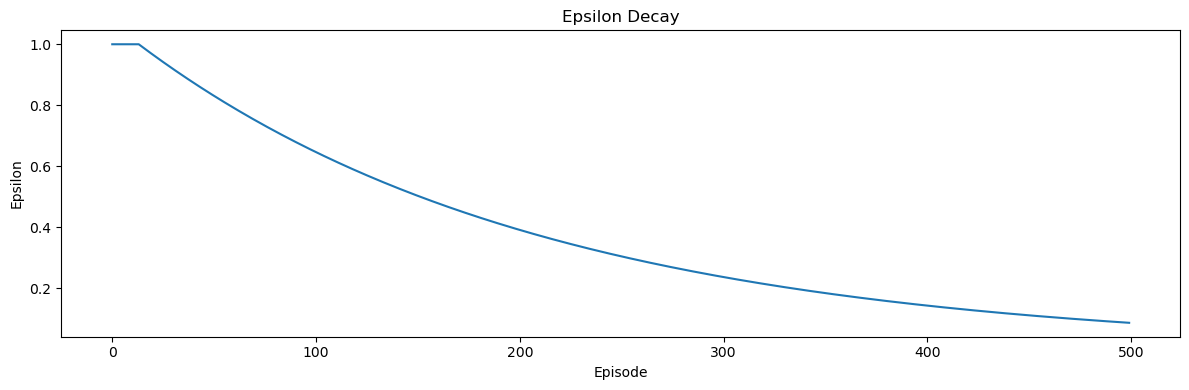

In [15]:

    
# Plot training progress
plt.figure(figsize=(12, 4))

# Epsilon decay
plt.plot(stats['episodes'], stats['epsilon'])
plt.title('Epsilon Decay')
plt.xlabel('Episode')
plt.ylabel('Epsilon')


plt.tight_layout()
plt.savefig('training_data/training_progress.png')
plt.show()

In [16]:
episodes = np.array(stats["episodes"])
epsilon = np.array(stats["epsilon"])
rewards = np.array(stats["rewards"])
wins = stats["wins"]
losses = stats["losses"]
draws = stats["draws"]

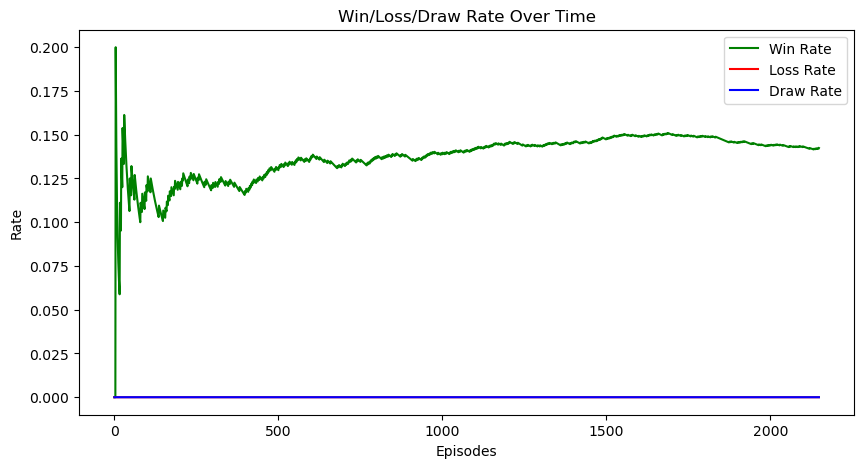

In [17]:
plt.figure(figsize=(10, 5))
win_rates = np.cumsum([1 if r == 1 else 0 for r in rewards]) / (np.arange(len(rewards)) + 1)
loss_rates = np.cumsum([1 if r == -1 else 0 for r in rewards]) / (np.arange(len(rewards)) + 1)
draw_rates = np.cumsum([1 if r == 0 else 0 for r in rewards]) / (np.arange(len(rewards)) + 1)

plt.plot(win_rates, label='Win Rate', color='green')
plt.plot(loss_rates, label='Loss Rate', color='red')
plt.plot(draw_rates, label='Draw Rate', color='blue')
plt.xlabel("Episodes")
plt.ylabel("Rate")
plt.title("Win/Loss/Draw Rate Over Time")
plt.legend()
plt.show()

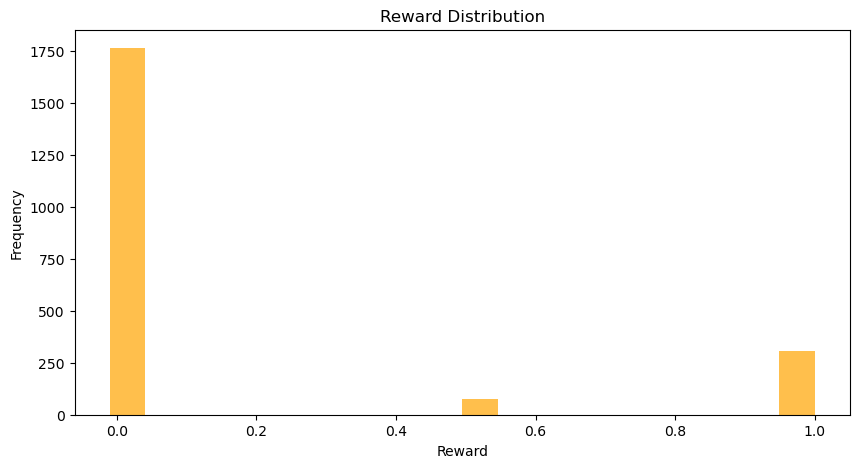

In [18]:
plt.figure(figsize=(10, 5))
plt.hist(rewards, bins=20, color='orange', alpha=0.7)
plt.xlabel("Reward")
plt.ylabel("Frequency")
plt.title("Reward Distribution")
plt.show()

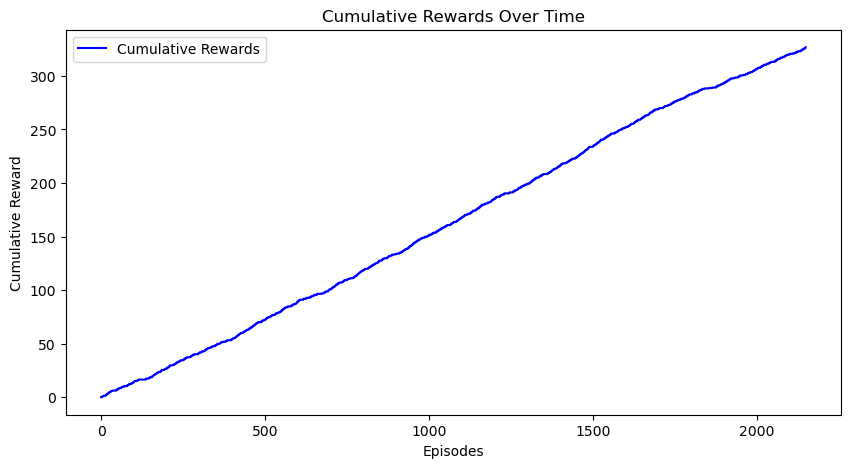

In [19]:
plt.figure(figsize=(10, 5))
cumulative_rewards = np.cumsum(rewards)
plt.plot(cumulative_rewards, label='Cumulative Rewards', color='blue')
plt.xlabel("Episodes")
plt.ylabel("Cumulative Reward")
plt.title("Cumulative Rewards Over Time")
plt.legend()
plt.show()

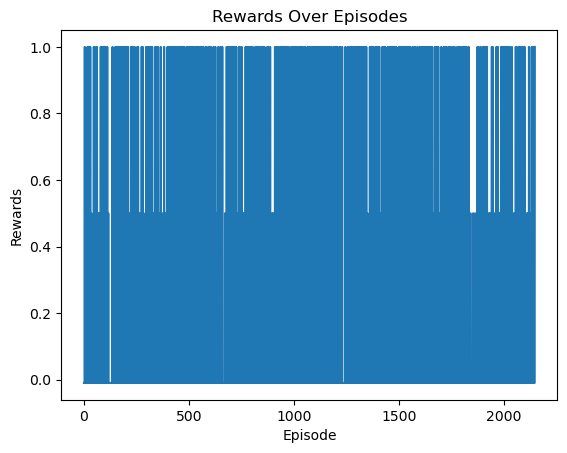

In [21]:
plt.plot([i for i in range(len(stats['rewards']))], stats['rewards'])
plt.title('Rewards Over Episodes')
plt.xlabel('Episode')
plt.ylabel('Rewards')
plt.savefig('training_data/rewards_over_episodes.png')
plt.show()

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


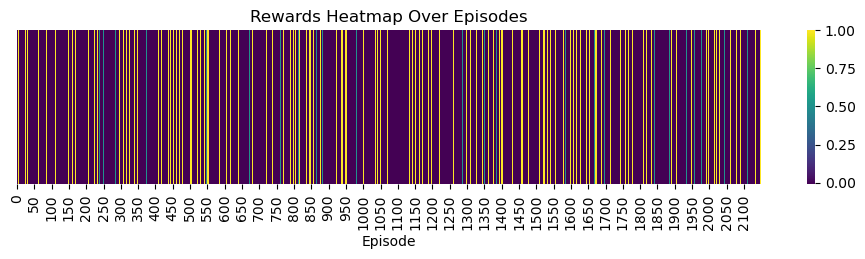

In [22]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Convert rewards into a 2D array (reshape if needed)
rewards = np.array(stats['rewards']).reshape(1, -1)  # Shape: (1, num_episodes)

# Create heatmap
plt.figure(figsize=(12, 2))  # Adjust figure size for better visualization
sns.heatmap(rewards, cmap="viridis", cbar=True, xticklabels=50, yticklabels=False)

# Labels and title
plt.title("Rewards Heatmap Over Episodes")
plt.xlabel("Episode")
plt.ylabel("")

# Save the figure
plt.savefig("training_data/rewards_heatmap.png", bbox_inches="tight")
plt.show()


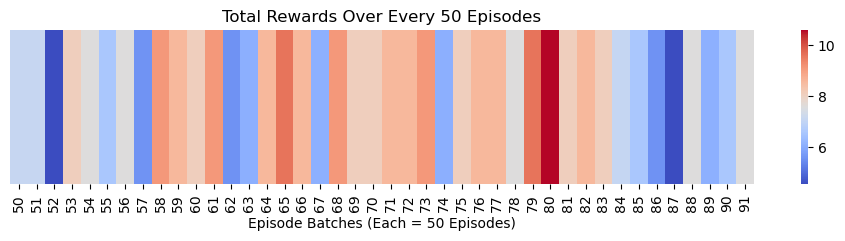

In [25]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Parameters
group_size = 50  # Number of episodes per batch

# Convert rewards list into NumPy array
rewards = np.array(stats['rewards'])

# Compute total rewards per 50 episodes
num_groups = len(rewards) // group_size  # Number of full groups
grouped_rewards = [np.sum(rewards[i * group_size:(i + 1) * group_size]) for i in range(num_groups)]

# X-axis labels: Start episode of each group (e.g., 0, 50, 100, ...)
x_labels = [i + group_size for i in range(num_groups)]

# Reshape for heatmap (1 row, multiple columns)
heatmap_data = np.array(grouped_rewards).reshape(1, -1)  # 1-row heatmap

# Plot heatmap
plt.figure(figsize=(12, 2))  # Adjust figure size
sns.heatmap(heatmap_data, cmap="coolwarm", cbar=True, xticklabels=x_labels, yticklabels=False)

# Labels and title
plt.title("Total Rewards Over Every 50 Episodes")
plt.xlabel("Episode Batches (Each = 50 Episodes)")
plt.ylabel("")

# Save the figure
plt.savefig("training_data/rewards_heatmap_50eps.png", bbox_inches="tight")
plt.show()

